### Challenge Set 4
Topic:        Linear Learning - Luther

Date:         07/23/2016

Name:         sravanthi ponnana


In [56]:
import pandas as pd
%matplotlib inline
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
import math

### Challenge 1

In [63]:
x = np.random.uniform(1, 1000,size=1000)
epsilon = np.random.normal(0, 0.5, 1000)
B0 = 12
B1 = 1.2
y = [B0+(B1*math.log(x[i]))+epsilon[i] for i in range(len(x))]

In [64]:
data = pd.DataFrame(index= range(1000))
data["x"] = x
data["y"] = y
data["x2"] = data["x"].apply(lambda x : x*x)
data["log_x"] = data["x"].apply(math.log)
data["epsilon"] = epsilon
data.head()

,x,y,x2,log_x,epsilon
0,250.999621,19.208722,63000.809771,5.525451,0.578180
1,383.138362,18.803706,146795.004550,5.948396,-0.334370
2,432.264668,18.973240,186852.743122,6.069038,-0.309606
3,882.771131,21.443876,779284.869124,6.783066,1.304197
4,976.207759,19.798201,952981.588262,6.883675,-0.462209


In [65]:
y, X = dmatrices('y ~ x2', data=data, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
pred = results.predict(X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     1014.
Date:                Sat, 23 Jul 2016   Prob (F-statistic):          3.96e-154
Time:                        11:41:42   Log-Likelihood:                -1319.8
No. Observations:                1000   AIC:                             2644.
Df Residuals:                     998   BIC:                             2653.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     18.0676      0.043    422.761      0.000        17.984    18.151
x2          3.051e-06   9.58e-08     31.845      0.000      2.86e-06  3.24e-06
==============================================================================
Omnibus:                      313.083   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1113.087
Skew:                          -1.487   Prob(JB):                    1.98e-242
Kurtosis:                       7.227   Cond. No.                     6.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

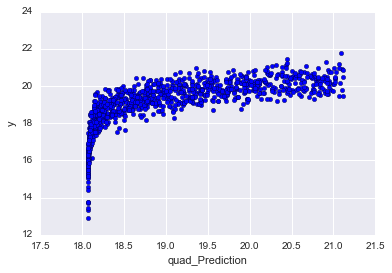

In [66]:
plt.scatter(pred, y)
plt.xlabel('Quad_Prediction')
plt.ylabel('y')
plt.show()

In [67]:
y, X = dmatrices('y ~ log_x', data=data, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
pred = results.predict(X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     5813.
Date:                Sat, 23 Jul 2016   Prob (F-statistic):               0.00
Time:                        11:41:44   Log-Likelihood:                -710.14
No. Observations:                1000   AIC:                             1424.
Df Residuals:                     998   BIC:                             1434.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.0479      0.093    128.856      0.000        11.864    12.231
log_x          1.1936      0.016     76.244      0.000         1.163     1.224
==============================================================================
Omnibus:                        1.215   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                1.228
Skew:                           0.022   Prob(JB):                        0.541
Kurtosis:                       2.834   Cond. No.                         36.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

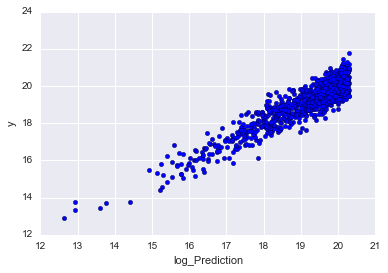

In [68]:
plt.scatter(pred, y)
plt.xlabel('Log_Prediction')
plt.ylabel('y')
plt.show()

### Challenge 2

In [101]:
x = np.random.uniform(1, 1000,size=1000)
epsilon = np.random.normal(0, 0.5, 1000)
B0 = 12
B1 = 1.2
B2 = 0.15
y = [B0+(B1*x[i])+(B2*x[i]*x[i])+epsilon[i] for i in range(len(x))]

In [102]:
data = pd.DataFrame(index= range(1000))
data["x1"] = x
data["y"] = y
data["x2"] = data["x1"].apply(lambda x : x*x)

data["epsilon"] = epsilon
data.head()

,x1,y,x2,epsilon
0,107.126921,1862.613465,11476.177099,0.634595
1,507.451748,39247.454167,257507.276731,0.420560
2,189.833425,5644.670721,36036.729350,-0.638791
3,541.311796,44614.610862,293018.460856,0.267578
4,146.302644,3398.784051,21404.463576,0.551342


In [103]:
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

y, X = dmatrices('y ~ x1', data=data, return_type='dataframe')
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)
model = LinearRegression().fit(X_train, y_train)

In [104]:
from sklearn import metrics
print("Training error",metrics.mean_squared_error(y_train,model.predict(X_train)))
print("Test error",metrics.mean_squared_error(y_test,model.predict(X_test)))

Training error 120772842.47
Test error 134979720.218


### Challenge 3

In [105]:
data["x0"] = 1
for i in range(2,8):
    data["x"+str(i)] = data["x1"].apply(lambda x: x**i)

In [106]:
data.head()

,x1,y,x2,epsilon,x0,x3,x4,x5,x6,x7
0,107.126921,1862.613465,11476.177099,0.634595,1,1.229408e+06,1.317026e+08,1.410890e+10,1.511443e+12,1.619162e+14
1,507.451748,39247.454167,257507.276731,0.420560,1,1.306725e+08,6.631000e+10,3.364912e+13,1.707531e+16,8.664894e+18
2,189.833425,5644.670721,36036.729350,-0.638791,1,6.840976e+06,1.298646e+09,2.465264e+11,4.679895e+13,8.884005e+15
3,541.311796,44614.610862,293018.460856,0.267578,1,1.586143e+08,8.585982e+10,4.647693e+13,2.515851e+16,1.361860e+19
4,146.302644,3398.784051,21404.463576,0.551342,1,3.131530e+06,4.581511e+08,6.702871e+10,9.806478e+12,1.434714e+15


In [107]:
from sklearn import cross_validation
import statsmodels.api as sm

y, X = dmatrices('y ~ x0 + x1 + x2 + x3 + x4 + x5 + x6 + x7', data=data, return_type='dataframe')

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)


train_err = []
test_err = []
r_sqrd = []
aic = []

for i in range(8):
    model = sm.OLS(y_train, X_train["x"+str(i)]).fit()
    train_err.append(metrics.mean_squared_error(y_train,model.predict(X_train["x"+str(i)])))
    
    test_err.append(metrics.mean_squared_error(y_test,model.predict(X_test["x"+str(i)])))
    
    r_sqrd.append(model.rsquared)
    
    aic.append(model.aic)

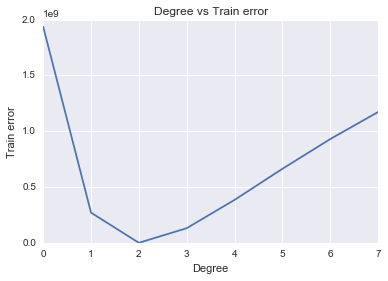

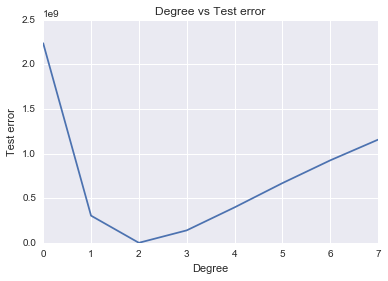

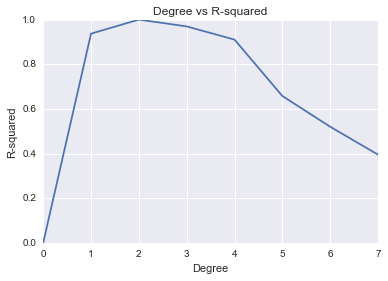

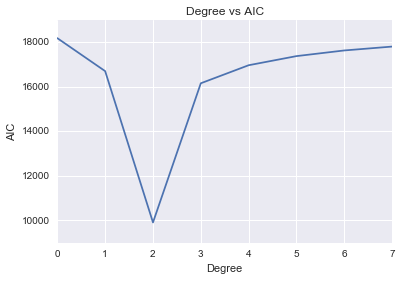

In [110]:
x= range(8)
plt.plot(x,train_err)
plt.title("Degree vs Train error")
plt.xlabel("Degree")
plt.ylabel("Train error")
plt.show()

plt.plot(x,test_err)
plt.title("Degree vs Test error")
plt.xlabel("Degree")
plt.ylabel("Test error")
plt.show()

plt.plot(x,r_sqrd)
plt.title("Degree vs R-squared")
plt.xlabel("Degree")
plt.ylabel("R-squared")
plt.show()


plt.plot(x,aic)
plt.title("Degree vs AIC")
plt.xlabel("Degree")
plt.ylabel("AIC")
plt.show()



### Challenge 4

In [118]:
m = []
train_err = []
test_err = []

y, X = dmatrices('y ~ x1', data=data, return_type='dataframe')

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

for rows in range(5,1000,5):
    m.append(rows)
    model = LinearRegression().fit(X_train[:rows], y_train[:rows])
    train_err.append(metrics.mean_squared_error(y_train[:rows], model.predict(X_train[:rows])))
    test_err.append(metrics.mean_squared_error(y_test, model.predict(X_test)))

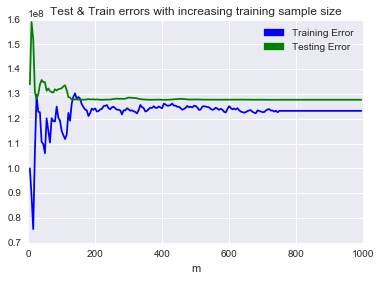

In [126]:
import matplotlib.patches as mpatches

plt.plot(m, train_err, 'b-')
plt.plot(m, test_err, 'g-')

plt.xlabel('m')
plt.title("Test & Train errors with increasing training sample size")
train = mpatches.Patch(color='blue', label='Training Error')
test = mpatches.Patch(color='green', label='Testing Error')
plt.legend(handles=[train,test])

plt.show()